<a href="https://colab.research.google.com/github/nikhilveldanda/INFO-5731/blob/main/In-Class-exercises/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

In [1]:
import nltk
nltk.download('stopwords')
#!pip install gensim==3.8.3
#!pip install pyLDAvis
import spacy.cli
spacy.cli.download("en")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
#import pyLDAvis
#import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [4]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 954 kB 34.0 MB/s 
     |████████████████████████████████| 356 kB 51.2 MB/s 
     |████████████████████████████████| 138 kB 44.6 MB/s 
     |████████████████████████████████| 3.5 MB 28.4 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [5]:
import pandas as pd 
# Import Selenium and its sub libraries
import selenium 
from selenium import webdriver
# Import BS4
import requests
from bs4 import BeautifulSoup
from pandas.core.frame import DataFrame

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [6]:
def get_reviews(url) -> DataFrame:
  driver.get(url)
  driver.implicitly_wait(1) 
  # Set up action to click on 'load more' button
  page = 1
  #We want at least 1000 review, so get 50 at a safe number
  while page<10:  
      try:
          load_more = driver.find_element_by_id('load-more-trigger')
          load_more.click()
          page+=1 
      except:
          break
  # After fully expand the page, we will grab data from whole website
  review = driver.find_elements_by_class_name('review-container')

  #title = []
  content = []
  #rating = []
  #date = []
  #user_name = []
  for n in range(len(review)):
      try:
          #Some reviewers only give review text or rating without the other, 
          #so we use try/except here to make sure each block of content must has all the element before append them to the list
          #Check if each review has all the elements
          #ftitle = review[n].find_element_by_class_name('title').text
          fcontent = review[n].find_element_by_class_name('content').get_attribute("textContent").strip()
          #frating = review[n].find_element_by_class_name('rating-other-user-rating').text
          #fdate = review[n].find_element_by_class_name('review-date').text
          fname = review[n].find_element_by_class_name('display-name-link').text
          #Then add them to the respective list
          #title.append(ftitle)
          content.append(fcontent)
          #rating.append(frating)
          #date.append(fdate)
          #user_name.append(fname)
      except:
          continue
  #Build data dictionary for dataframe
  data = {
          'Text' : content
      }
  #Build dataframe for each movie to export
  review = pd.DataFrame(data = data)
  return review

df = get_reviews("https://www.imdb.com/title/tt6751668/reviews?ref_=tt_urv")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:445: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


,Text
0,"I was able to see ""Parasite"" a few days ago at..."
1,PARASITE is an excellent effort from Korean di...
2,The Kim family leeches off others and lives in...
3,Usually I don't read reviews before seeing a f...
4,"Okay, so these slightly over two hours are ""Pa..."
...,...
220,Bong Joo Ho has been making ingenious social c...
221,Spoilers. don't be fooled. this is not a brill...
222,Bong Joon-Ho is a director that I'll definitel...
223,This is cinema in its purest form. Parasite is...


In [7]:
data = df['Text'].tolist()

data_words = []
for line in data:
  data_words.append(gensim.utils.simple_preprocess(str(line), deacc=True))

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [8]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
after_stopword_removal = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
bigrams = [bigram_mod[doc] for doc in after_stopword_removal]
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
after_lemmatization = []
for sent in bigrams:
  doc = nlp(" ".join(sent)) 
  after_lemmatization.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

id2word = corpora.Dictionary(after_lemmatization)
texts = after_lemmatization
corpus = [id2word.doc2bow(text) for text in after_lemmatization]
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 4), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 2), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 4), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 4), (53, 1), (54, 1), (55, 1)]]

Perplexity:  -7.798213645671653

Coherence Score:  0.43730310503330216


In [9]:
from gensim.test.utils import common_corpus, common_dictionary 

In [10]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2021-10-23 01:29:02--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.48MB/s    in 1.6s    

2021-10-23 01:29:04 (9.48 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [11]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [12]:
import os
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=after_lemmatization, start=2, limit=60, step=6)

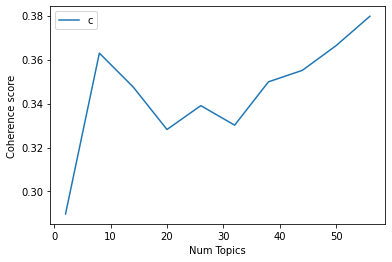

In [15]:
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.2898
Num Topics: 8  - Coherence Value: 0.3629
Num Topics: 14  - Coherence Value: 0.3475
Num Topics: 20  - Coherence Value: 0.3282
Num Topics: 26  - Coherence Value: 0.339
Num Topics: 32  - Coherence Value: 0.3302
Num Topics: 38  - Coherence Value: 0.3499
Num Topics: 44  - Coherence Value: 0.3551
Num Topics: 50  - Coherence Value: 0.3663
Num Topics: 56  - Coherence Value: 0.3797


In [17]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"film" + 0.018*"find" + 0.015*"make" + 0.014*"vote_permalink" + '
  '0.014*"helpful" + 0.014*"sign" + 0.014*"movie" + 0.012*"time" + '
  '0.012*"watch" + 0.011*"think"'),
 (1,
  '0.019*"edit" + 0.012*"bong" + 0.012*"flawless" + 0.011*"exposition" + '
  '0.011*"emotionally" + 0.009*"loud" + 0.008*"form" + 0.008*"level" + '
  '0.008*"narrative" + 0.008*"co"'),
 (2,
  '0.031*"rich" + 0.026*"poor" + 0.021*"director" + 0.013*"tamil" + '
  '0.012*"intelligent" + 0.012*"dumb" + 0.011*"pace" + 0.011*"plot" + '
  '0.011*"commentary" + 0.011*"gap"'),
 (3,
  '0.015*"nice" + 0.010*"go" + 0.010*"observation" + 0.009*"people" + '
  '0.009*"seemingly" + 0.008*"come" + 0.008*"treat" + 0.008*"stupid" + '
  '0.008*"generally" + 0.007*"scary"'),
 (4,
  '0.018*"dress" + 0.018*"mainly" + 0.010*"ring" + 0.010*"esteem" + '
  '0.010*"hitchcock" + 0.010*"finance" + 0.010*"fear" + 0.008*"civilly" + '
  '0.008*"echelon" + 0.008*"methodical"'),
 (5,
  '0.015*"poor" + 0.014*"family" + 0.014*"film" + 

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [19]:
# Write your code here
from gensim.models import LsiModel

lsamodel = LsiModel(corpus, 20, id2word)

def compute_coherence_values_lsi(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

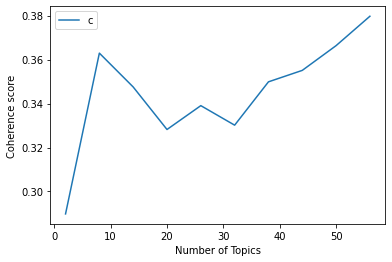

In [20]:
start,stop,step=2,60,6
model_list_lsa, coherence_values_lsa = compute_coherence_values_lsi(id2word, corpus,after_lemmatization,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.3002
Num Topics: 8  - Coherence Value: 0.3005
Num Topics: 14  - Coherence Value: 0.3123
Num Topics: 20  - Coherence Value: 0.3054
Num Topics: 26  - Coherence Value: 0.3164
Num Topics: 32  - Coherence Value: 0.2946
Num Topics: 38  - Coherence Value: 0.3047
Num Topics: 44  - Coherence Value: 0.2998
Num Topics: 50  - Coherence Value: 0.3034
Num Topics: 56  - Coherence Value: 0.3039


In [22]:
pprint(lsamodel.print_topics())

[(0,
  '0.487*"film" + 0.383*"family" + 0.274*"movie" + 0.216*"parasite" + '
  '0.175*"good" + 0.145*"see" + 0.138*"rich" + 0.137*"make" + 0.133*"poor" + '
  '0.130*"get"'),
 (1,
  '-0.622*"film" + 0.574*"movie" + 0.217*"rich" + 0.174*"people" + '
  '0.160*"family" + 0.141*"make" + 0.133*"poor" + -0.069*"see" + '
  '0.064*"member" + 0.061*"simply"'),
 (2,
  '0.525*"family" + -0.395*"movie" + 0.227*"park" + -0.197*"film" + '
  '-0.155*"see" + 0.147*"live" + 0.139*"son" + 0.137*"get" + -0.125*"think" + '
  '0.105*"home"'),
 (3,
  '0.414*"rich" + -0.293*"movie" + 0.274*"poor" + -0.202*"good" + '
  '-0.181*"family" + 0.176*"class" + 0.159*"people" + 0.127*"smell" + '
  '0.120*"time" + -0.115*"see"'),
 (4,
  '0.312*"family" + 0.271*"film" + -0.221*"park" + -0.209*"parasite" + '
  '0.207*"rich" + 0.202*"poor" + -0.153*"get" + -0.132*"even" + 0.120*"good" + '
  '-0.110*"kim"'),
 (5,
  '-0.299*"parasite" + 0.294*"really" + 0.243*"also" + 0.196*"say" + '
  '0.182*"feel" + 0.157*"go" + 0.150*"pe


Summarization of LSA Topics

NLP for clinical review system

NLP for clinical report detection

Electronic based medical record extraction using NLP

Systematic Review of unstructured opinion information using NLP

Extraction of medical and suicidal elctronic information

NLP for sentimental review

NLP for health and sytematic reviews

Automatic detection and text processing of clinical information

Clinical information extraction using deep learning

NLP for semenatical representation of survey text

Review of information retrieval using NLP

Clinical architecture extraction

Summary of detection techniques

Software for respiratory detection using deep learning

Machine learning solution for active health survey

Technique for research process detection

Retrieval process for research care and information mining

Home automation control and voice detection using IOT

Efficient soluiton for chinese cluster and whister graphs using NLP

Challenges for home automation control using NLP

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.


Latent Semantic Analysis has lower accuracy than Latent Dirichlet allocation has better accuracy. Here, The Coherence value for optimal number of topics for LSA is 45 where as for LDA is 73. From this we will get to know that Accuracy for LDA is better. LDA has better accuracy that means we can easily generalize LDA model to other new documents. LSA has less interpretability among the topics beacuse of dimensionality reduction where as we interpret topic very easily in LDA. I got 14 topics for LDA which are highly interpretable than 20 topics of LSA. LSA has less efficient representation.